In [1]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
using ProgressMeter
include("ComplexStorkey.jl");
rng = MersenneTwister(1234);

### Conferindo o exemplo com a versão mais rápida do algoritmo

In [2]:
N = 200;
Pv = 1:2:30;

In [3]:
### Noise Level Vector
pr = 0.3

## Noise Vector
Success_0 = zeros(Int64,(1,length(Pv)));
Success_1 = zeros(Int64,(1,length(Pv)));
Success_2 = zeros(Int64,(1,length(Pv)));
Success_3 = zeros(Int64,(1,length(Pv)));
Success_4 = zeros(Int64,(1,length(Pv)));

### Number of Simulations
Nsim = 300

### Number of maximum iterations for the HNN model
it_max =1000

### Rule Name
rule = "S1"

"S1"

In [4]:
MultiStates_binary,MultiStates_complex,MultiStates_quat  = ComplexStorkey.Multi_Estados()

([1, -1], Complex{Float64}[1.0+1.0im, 1.0-1.0im, -1.0+1.0im, -1.0-1.0im], Quaternions.Quaternion{Float64}[Quaternion{Float64}(-1.0, -1.0, -1.0, -1.0, false); Quaternion{Float64}(1.0, -1.0, -1.0, -1.0, false); … ; Quaternion{Float64}(-1.0, 1.0, 1.0, 1.0, false); Quaternion{Float64}(1.0, 1.0, 1.0, 1.0, false)])

In [5]:
# First Order W matrix
Wc = zeros(Complex,N,N);

In [6]:
@showprogress for i = 1:length(Pv)
    
    P = Pv[i]
# Complex Matrix 
    U = Array{ComplexF64}(undef,(N,P))

    for i = 1:N
        for j = 1:P
            U[i,j] = sign.(randn(rng,Float64)) + im*sign.(randn(rng,Float64))
        end
    end


    W1 = ComplexStorkey.storkey_learning(U,ComplexStorkey.first)
    W2 = ComplexStorkey.storkey_learning(U,ComplexStorkey.second)
    Wc = ComplexStorkey.Correlation(U)
    Wp = ComplexStorkey.Projection(U)
    u1 = copy(U[:,1]);

        
    for s = 1:Nsim
        
        ### Adding Noise
        xr = ComplexStorkey.noise_prob(u1,MultiStates_complex,pr)


        y = ComplexStorkey.Asy(W1,xr,ComplexStorkey.splitsign,nothing,it_max)

        Error = norm(u1-y)

        if Error<1.e-4
            Success_0[i] = Success_0[i] + 1
        end

        y = ComplexStorkey.Asy(W2,xr,ComplexStorkey.splitsign,nothing,it_max)

        Error = norm(u1-y)

        if Error<1.e-4
            Success_1[i] = Success_1[i] + 1
        end

        y = ComplexStorkey.Asy(Wc,xr,ComplexStorkey.splitsign,nothing,it_max)

        Error = norm(u1-y)

        if Error<1.e-4
            Success_2[i] = Success_2[i] + 1
        end

        y = ComplexStorkey.Asy(Wp,xr,ComplexStorkey.splitsign,nothing,it_max)

        Error = norm(u1-y)

        if Error<1.e-4
            Success_3[i] = Success_3[i] + 1
        end


end
    
@save "JLDs/ComplexP.jld2" Success_0 Success_1 Success_2 Success_3 Nsim Pv
     
end

Progress: 100%|█████████████████████████████████████████| Time: 0:01:17


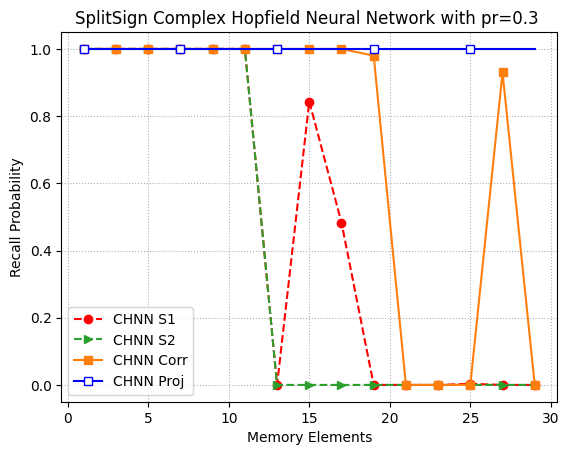

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [10]:
@load "JLDs/ComplexP.jld2"
### Loading String Name
name1 = "SplitSign Complex Hopfield Neural Network with pr=0.3 "
name = name1


title(name)

plot(Pv,Success_0[1,:]/Nsim,linewidth=1.5, color="red",linestyle ="dashed", marker="o",label="CHNN S1")
plot(Pv,Success_1[1,:]/Nsim,linewidth=1.5, color="#2ca02c",linestyle ="dashed", marker=">",label="CHNN S2")
plot(Pv,Success_2[1,:]/Nsim,linewidth=1.5, color="#ff7f0e",linestyle ="solid", marker="s",label="CHNN Corr")
plot(Pv,Success_3[1,:]/Nsim,linewidth=1.5, color="blue",linestyle ="solid", marker="s",markerfacecolor = "white",markevery=3,label="CHNN Proj")


grid(linestyle="dotted")
xlabel("Memory Elements")
ylabel("Recall Probability")
legend()

savefig("Figures/ComplexSplitSign_P.eps")
savefig("Figures/ComplexSplitSign_P.eps")